In [1]:
import pandas as pd
import pipeline as p
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import rcParams
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning)
rcParams.update({'figure.autolayout': True})

/Users/kendra/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [3]:
# plt.style.use('ggplot')
# plt.style.use('/Users/kendra/.matplotlib/kf_fig.mplstyle')
plt.style.use('/Users/kendra/.matplotlib/base_style.mplstyle')

In [6]:
df = p.open_pkl('Data/breast_df_for_model.pkl')
df_sub = p.open_pkl('Data/breast_df_with_sub_for_model.pkl')

In [7]:
df.head()

,MAR_STAT_MOD,RACE_MOD,AGE_DX,GRADE,TUMSIZ,SURG,SEQ_NUM,PRIMSITE,POS_NODES,INVAS,HST_STGA,TARGET
0,1.0,3,45.0,3.0,40.0,1.0,0,C504,1.0,1,2.0,1
1,0.0,3,49.0,2.0,50.0,1.0,0,C502,1.0,1,2.0,1
4,1.0,3,69.0,2.0,15.0,1.0,0,C504,0.0,1,1.0,1
5,1.0,3,65.0,3.0,34.0,1.0,1,C505,0.0,1,1.0,1
6,1.0,3,34.0,3.0,15.0,1.0,0,C506,0.0,1,1.0,1


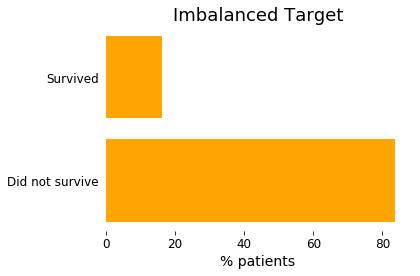

In [70]:
dist = p.vcs(df, 'TARGET') / len(df) * 100
data = dist.values
# labels = dist.index
labels = ['Did not survive', 'Survived']
y = len(data)

plt.xlabel('% patients')
plt.title('Imbalanced Target', fontsize=18)
plt.barh(range(y), data, tick_label=labels, color='orange');


In [121]:
df['AGE_DX'].describe()

count    222127.000000
mean         60.105777
std          13.372055
min          17.000000
25%          50.000000
50%          60.000000
75%          70.000000
max         103.000000
Name: AGE_DX, dtype: float64

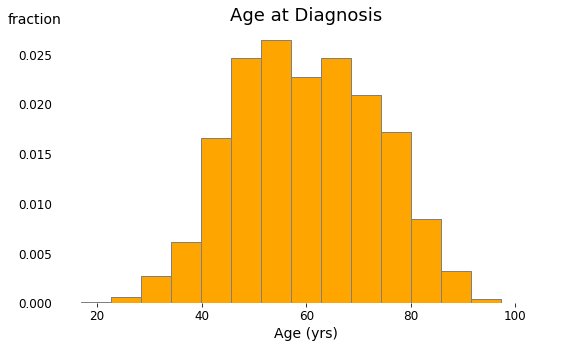

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

plt.hist(df['AGE_DX'], bins=15, density=True, color='orange', edgecolor='gray', linewidth=1)
plt.xlabel('Age (yrs)') #, fontsize=14)
ax.yaxis.set_label_coords(-0.05, 1) 
ax.set_ylabel('fraction', rotation=0) #,fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.title('Age at Diagnosis', fontsize=18);
# plt.savefig('Figures/AgeAtDx.png', dpi=300, transparent=True)

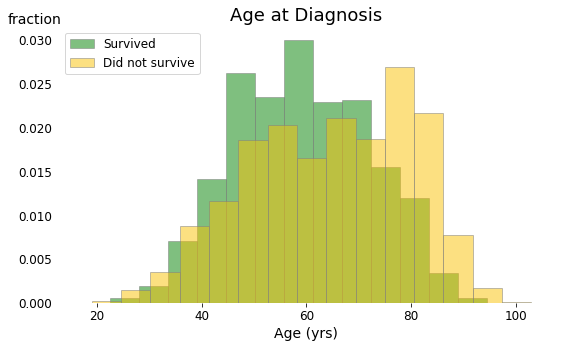

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

plt.hist(df[df['TARGET'] == 1]['AGE_DX'], 
         bins=15, density=True, color='green', 
         alpha=0.5, edgecolor='gray', linewidth=1,
        label="Survived")
plt.hist(df[df['TARGET'] == 0]['AGE_DX'], 
         bins=15, density=True, color='xkcd:goldenrod', 
         alpha=0.5, edgecolor='gray', linewidth=1,
        label="Did not survive")
plt.xlabel('Age (yrs)') #, fontsize=14)
ax.yaxis.set_label_coords(-0.05, 1) 
ax.set_ylabel('fraction', rotation=0) #,fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.legend()

plt.title('Age at Diagnosis', fontsize=18);
plt.savefig('Figures/AgeAtDx.png', dpi=300, transparent=True)

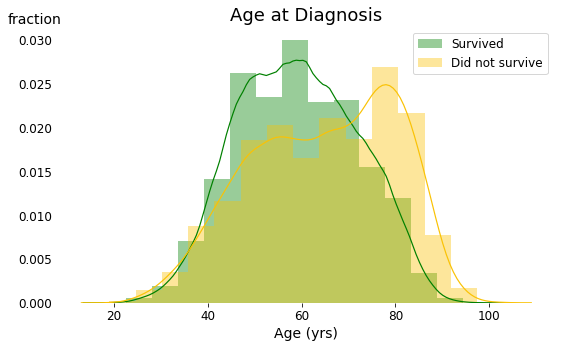

In [12]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

sns.distplot(df[df['TARGET'] == 1]['AGE_DX'],
         bins=15, hist=True, color='green', 
        label="Survived")
sns.distplot(df[df['TARGET'] == 0]['AGE_DX'], 
         bins=15, hist=True, color='xkcd:goldenrod', 
        label="Did not survive")
plt.xlabel('Age (yrs)') #, fontsize=14)
ax.yaxis.set_label_coords(-0.05, 1) 
ax.set_ylabel('fraction', rotation=0) #,fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.legend()

plt.title('Age at Diagnosis', fontsize=18);
plt.savefig('Figures/AgeAtDx_sns.png', dpi=300, transparent=True)

**Grade**

In [124]:
dist = p.vcs(df, 'GRADE')
data = dist.values
labels = dist.index
y = len(data)

<BarContainer object of 4 artists>

/Users/kendra/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


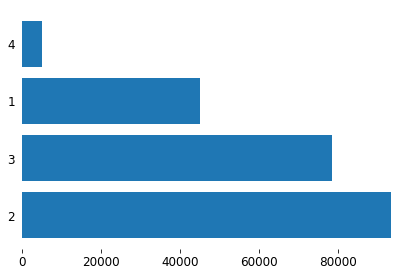

In [125]:
plt.barh(range(y), data, tick_label=labels)

**Tumor Size**
- 001-988 Exact size in millimeters
- 989 989 millimeters or larger

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29204eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a292047b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29204ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2ac38a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2ac38208>],
 'means': []}

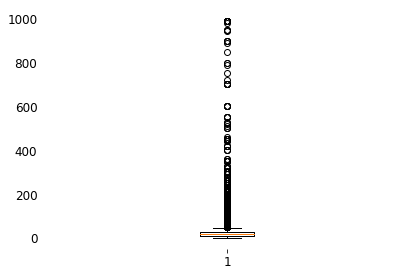

In [125]:
plt.boxplot(df['TUMSIZ'])

In [123]:
df['TUMSIZ'].describe()

count    222127.000000
mean         21.640183
std          21.761431
min           0.000000
25%          10.000000
50%          17.000000
75%          25.000000
max         989.000000
Name: TUMSIZ, dtype: float64

**Pos Nodes**

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1bc23dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bc23b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1bc23400>],
 'medians': [<matplotlib.lines.Line2D at 0x1a195c60f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a195c61d0>],
 'means': []}

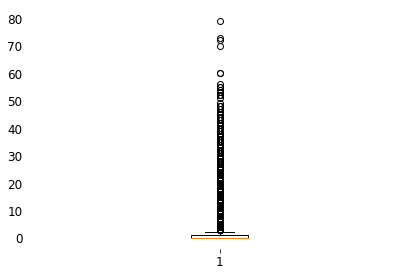

In [126]:
plt.boxplot(df['POS_NODES'])

In [127]:
df['POS_NODES'].describe()

count    222127.000000
mean          1.328510
std           3.406329
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          79.000000
Name: POS_NODES, dtype: float64

### Subtypes

In [25]:
dist = p.vcs(df_sub, 'HER2')
data = dist.values
labels = dist.index
y = len(data)

In [55]:
d1 = df_sub[df_sub['TARGET'] == 1]['HER2'].value_counts().values
d1 = d1/len(df_sub[df_sub['TARGET'] == 1])
d0 = df_sub[df_sub['TARGET'] == 0]['HER2'].value_counts().values
d0 = d0/len(df_sub[df_sub['TARGET'] == 0])

Text(0.5, 0, '# of patients')

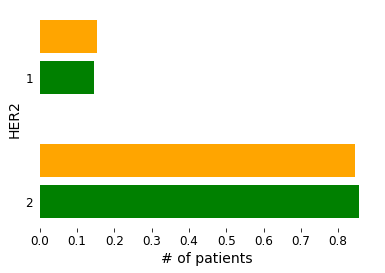

In [58]:
plt.barh([0,3], d1, tick_label=labels, color='green')
plt.barh([1,4], d0, color='orange')
plt.ylabel('HER2')
plt.xlabel('# of patients')

In [39]:
surv_color = 'xkcd:light teal'
surv_text_color = 'xkcd:teal'
dns_color = 'xkcd:dark pink'

### Sub-type
- 1         Her2+/HR+
- 2     Her2+/HR-
- 3       Her2-/HR+
- 4 Triple Negative

In [107]:
dist = p.vcs(df_sub, 'BRST_SUB')
data = dist.values
# labels = dist.index
labels = ['Her2+/HR+','Her2+/HR-','Her2-/HR+', 'Triple Neg']
y = len(data)

In [108]:
d1 = df_sub[df_sub['TARGET'] == 1]['BRST_SUB'].value_counts().values
d1 = d1/len(df_sub[df_sub['TARGET'] == 1]) * 100
d0 = df_sub[df_sub['TARGET'] == 0]['BRST_SUB'].value_counts().values
d0 = d0/len(df_sub[df_sub['TARGET'] == 0]) * 100

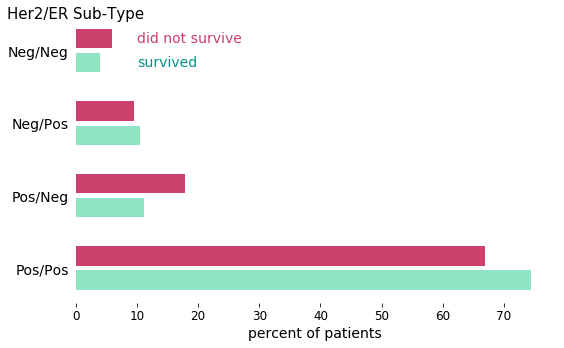

In [120]:
labels = ['Pos/Pos','Pos/Neg','Neg/Pos', 'Neg/Neg']
# labels = ['Her2+/HR+','Her2+/HR-','Her2-/HR+', 'Triple Neg']


fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)

plt.barh(np.arange(1,y*3, 3), d0, color=dns_color)
plt.barh(np.arange(0,y*3, 3), d1, color=surv_color) # tick_label=labels, 

plt.yticks(np.arange(0.5,y*3, 3),labels=labels, fontsize=14)
ax.yaxis.set_label_coords(0, 1.02) 
# ax.set_ylabel('Her2/ER Sub-Type', x=0.02, y=0.98, rotation=0, fontsize=16)
ax.set_ylabel('Her2/ER Sub-Type', x=0.0, y=0.98, rotation=0, fontsize=15)

plt.text(10, 9.85, 'did not survive', color=dns_color, fontsize=14)
plt.text(10, 8.85, 'survived', color=surv_text_color, fontsize=14)
plt.xlabel('percent of patients');
plt.savefig('Figures/Sub-type.png', dpi=300, transparent=False)

In [85]:
def plot_surv_vs_not(df, feature, data_labels=None, ylabel=None, figname=None):
    dist = p.vcs(df, feature)
    data = dist.values
    y = len(data)
    
    if not data_labels:
        data_labels = dist.index
    if not ylabel:
        ylabel=feature
    
    # d1 = survived, d0 = did not survive
    d0 = df[df['TARGET'] == 0][feature].value_counts().values
    d0 = d0/len(df[df['TARGET'] == 0]) * 100
    d1 = df[df['TARGET'] == 1][feature].value_counts().values
    d1 = d1/len(df[df['TARGET'] == 1]) * 100

    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)

    plt.barh(np.arange(1,y*3, 3), d0, color=dns_color)
    plt.barh(np.arange(0,y*3, 3), d1, color=surv_color) # tick_label=labels,
    
    plt.yticks(np.arange(0.5,y*3, 3),labels=data_labels, fontsize=14)
#     ax.yaxis.set_label_coords(0, 1.02) 
    
    ax.set_ylabel(ylabel, x=-0.095, y=0.98, rotation=0, fontsize=16)

    plt.text(10, 9.85, 'did not survive', color=dns_color, fontsize=14)
    plt.text(10, 8.85, 'survived', color=surv_text_color, fontsize=14)
    plt.xlabel('percent of patients')
    
    if figname:
        plt.savefig(f'Figures/{figname}.png', dpi=300, transparent=False)
    

In [59]:
df.head()

,MAR_STAT_MOD,RACE_MOD,AGE_DX,GRADE,TUMSIZ,SURG,SEQ_NUM,PRIMSITE,POS_NODES,INVAS,HST_STGA,TARGET
0,1.0,3,45.0,3.0,40.0,1.0,0,C504,1.0,1,2.0,1
1,0.0,3,49.0,2.0,50.0,1.0,0,C502,1.0,1,2.0,1
4,1.0,3,69.0,2.0,15.0,1.0,0,C504,0.0,1,1.0,1
5,1.0,3,65.0,3.0,34.0,1.0,1,C505,0.0,1,1.0,1
6,1.0,3,34.0,3.0,15.0,1.0,0,C506,0.0,1,1.0,1


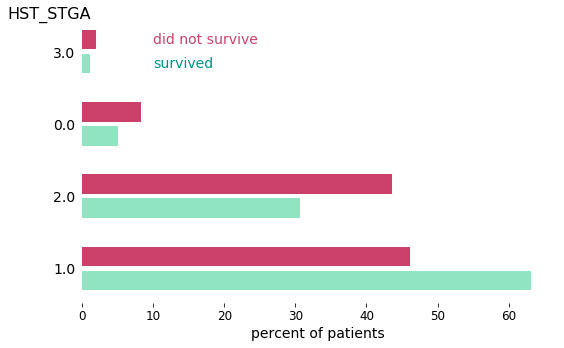

In [86]:
plot_surv_vs_not(df, 'HST_STGA')

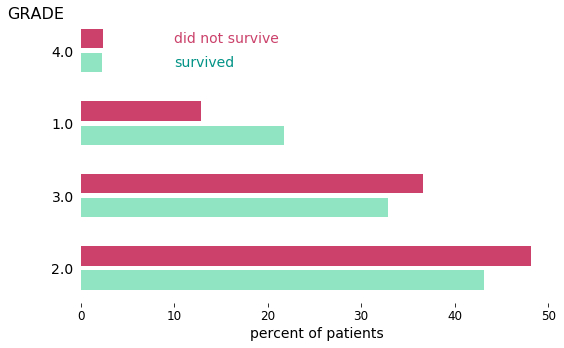

In [62]:
plot_surv_vs_not(df, 'GRADE')

In [74]:
dist = p.vcs(df, 'TARGET') / len(df) * 100
data = dist.values
# labels = dist.index
labels = ['Survive', 'Do not survive']
y = len(data)

In [75]:
data[0]

83.705717900120206

In [80]:
np.arange(0,2)

array([0, 1])

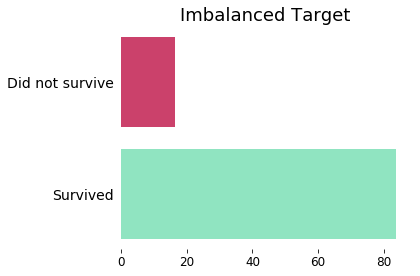

In [82]:
# plt.xlabel('% patients')
plt.title('Imbalanced Target', fontsize=18)
plt.barh(0, data[0],  color=surv_color);
plt.barh(1, data[1], color=dns_color);
plt.yticks(np.arange(0,2),labels=labels, fontsize=14)
ax.yaxis.set_label_coords(0, 1.02) 
plt.savefig('Figures/Imbalance.png', dpi=300, transparent=False)

In [97]:
data[0], data[1]

(83.705717900120206, 16.294282099879798)

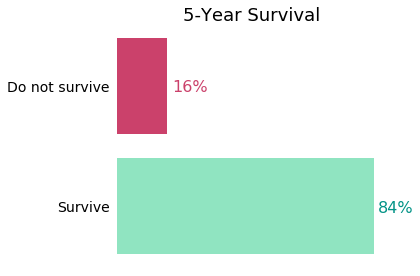

In [104]:
# plt.xlabel('% patients')
labels = ['Survive', 'Do not survive']

plt.barh(0, data[0],  color=surv_color);
plt.barh(1, data[1], color=dns_color);
plt.yticks(np.arange(0,2),labels=labels, fontsize=14)
ax = plt.gca()
ax.xaxis.set_ticks_position('none') 
ax.xaxis.set_visible(False)
plt.text(18, 0.95, '16%', fontsize=16, color=dns_color)
plt.text(85, -0.05, '84%', fontsize=16, color=surv_text_color)

plt.title('5-Year Survival', fontsize=18)
plt.savefig('Figures/Survival_Percentage.png', dpi=300, transparent=False)